# Theory Behind the BSHW Model and the COS Method

This document explains the theory and the mathematical formulation used in the code for the Black-Scholes Hull-White (BSHW) model with the COS method. We break down each major component and function, providing both a formal quantitative explanation using LaTeX and a simplified “Nitish Sir” Hinglish explanation.

---

## 1. Overview of the BSHW Model

The BSHW model combines the classical Black-Scholes option pricing framework with the Hull-White model for stochastic interest rates. This allows us to price options while capturing the dynamics of both the underlying asset price and the interest rates.

### **Quantitative Finance Explanation**

In classical Black-Scholes, the option price is derived under the assumption of a constant risk-free rate. However, in reality, interest rates fluctuate. The Hull-White model introduces a stochastic process for the short rate \( r(t) \):

$$
dr(t) = \lambda \left( \theta(t) - r(t) \right) dt + \eta \, dW(t)
$$

where:  
- \( \lambda \) is the speed of mean reversion,  
- \( \theta(t) \) is the time-dependent drift to match the initial term structure,  
- \( \eta \) is the volatility of the interest rate, and  
- \( dW(t) \) represents the Brownian motion.

The discount factor or zero-coupon bond price is given by:

$$
P(0,T) = \exp(-rT)
$$

in a simple case, but for a stochastic process, it is obtained via calibration to the market curve.

### **Nitish Sir (Hinglish) Explanation**

**Block 1:**  
"BSHW model mein hum Black-Scholes ke saath saath interest rate ki randomness bhi consider karte hain. Matlab, interest rate ko fix nahi samajhte, balki uska bhi time ke saath fluctuation capture karte hain. Iske liye Hull-White model use karte hain jismein rate mean-reverting nature dikhata hai."

**Block 2:**  
"Seedhi baat ye hai ki yeh model aapko realistic pricing deta hai, kyunki real market mein interest rate constant nahi hote. Aap discounting ko bhi is model ke through better capture kar paate ho."

---

## 2. The COS Method for Option Pricing

The COS method uses Fourier-cosine series expansion to price options. It approximates the option price by expanding the payoff function in terms of cosine basis functions using the characteristic function of the underlying log-price process.

### **Quantitative Finance Explanation**

For an option with payoff function \( V(x) \), where \( x = \ln\left(\frac{S}{K}\right) \), the COS method writes the price as:

$$
V(0,S_0) = e^{-rT} \sum_{k=0}^{N-1} \operatorname{Re} \left\{ \varphi\left(u_k\right) e^{iu_k (x_0 - a)} \right\} H_k
$$

with:
- \( x_0 = \ln\left(\frac{S_0}{K}\right) \)
- \( u_k = \frac{k\pi}{b-a} \)
- \([a, b]\) is the truncation interval chosen as:
  $$
  a = -L\sqrt{T}, \quad b = L\sqrt{T}
  $$
- \( H_k \) are coefficients determined by integrating the cosine expansion of the payoff over \([a, b]\).

The functions `CallPutOptionPriceCOSMthd_StochIR`, `CallPutCoefficients`, and `Chi_Psi` implement these calculations.

### **Nitish Sir (Hinglish) Explanation**

**Block 1:**  
"Is method mein hum option ke payoff ko Fourier cosine series se expand karte hain. Yani, hum option ke intrinsic value ko multiple cosine functions ke combinations se represent karte hain, jisse integration bahut hi efficient ho jata hai."

**Block 2:**  
"Simply bolun toh, aap payoff function ko ek series mein likhte ho jismein har term ke weight \( H_k \) milte hain. In weights aur characteristic function ke madad se aap option ka price nikalte ho — yeh code mein dikhaya gaya hai."

---

## 3. Key Functions and Their Mathematical Formulas

### 3.1 CallPutOptionPriceCOSMthd_StochIR

**Purpose:**  
Prices a European call or put option by applying the COS method, using the characteristic function \( \varphi(u) \) of the underlying process.

**Core Formula:**

$$
\text{Price} = K \cdot \Re \left\{ e^{iu (x_0 - a)} \sum_{k=0}^{N-1} \varphi(u_k) \cdot H_k \right\}
$$

For call options, the formula is adjusted by the call-put parity:

$$
\text{Call Price} = \text{Put Price} + S_0 - K \cdot P(0,T)
$$

### 3.2 CallPutCoefficients and Chi_Psi

**Purpose:**  
Calculates the coefficients \( H_k \) for the option payoff expansion.  
- **Chi Component:**

  $$ 
  \chi_k = \frac{1}{1 + \left(\frac{k\pi}{b-a}\right)^2} \left( e^{d}\cos\left(\frac{k\pi(d-a)}{b-a}\right) - e^{c}\cos\left(\frac{k\pi(c-a)}{b-a}\right) + \frac{k\pi}{b-a}\Big(e^{c}\sin\left(\frac{k\pi(c-a)}{b-a}\right) - e^{d}\sin\left(\frac{k\pi(d-a)}{b-a}\right)\Big) \right)
  $$

- **Psi Component:**

  $$
  \psi_k = \begin{cases}
  d - c, & k=0 \\
  \frac{(b-a)}{k\pi}\left[\sin\left(\frac{k\pi(d-a)}{b-a}\right)-\sin\left(\frac{k\pi(c-a)}{b-a}\right) \right], & k \ge 1 
  \end{cases}
  $$

Then, the coefficients for puts (and similarly for calls with adjustments) are computed as:

$$
H_k = \frac{2}{b - a} \left(\psi_k - \chi_k\right)
$$

### 3.3 BS_Call_Option_Price

**Purpose:**  
Computes the Black-Scholes price for call or put options.

**Core Formulas:**

For a call option:

$$
d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}, \quad d_2 = d_1 - \sigma\sqrt{T}
$$

$$
\text{Call Price} = S_0 \, N(d_1) - K\, e^{-rT} N(d_2)
$$

For a put option, the pricing formula is derived using put-call parity.

### 3.4 ImpliedVolatilityBlack76

**Purpose:**  
Computes the implied volatility from the market option price using an iterative (Newton-Raphson) method. It inverts the Black (1976) formula for forward prices to match the market price.

### 3.5 ChFBSHW

**Purpose:**  
Calculates the characteristic function \( \varphi(u) \) for the BSHW model. This involves:
- Determining the forward rate \( r_0 \) from the zero-coupon bond price \( P(0, T) \).
- Defining \( \theta(t) \) to adjust for the term structure.
- Computing an integrated function over the time grid for the interest rate process.

The overall characteristic function is given by:

$$
\varphi(u) = \exp\Big( A(u) + C(u,T) \cdot r_0 \Big)
$$

where \( A(u) \) includes terms due to the volatility of the asset and the interest rate process, plus an integration term over \( \theta(t) \).

### 3.6 BSHWVolatility

**Purpose:**  
Computes the model-implied volatility from the Hull-White interest rate parameters by integrating an adjusted instantaneous volatility function over time:

$$
\sigma_F(t) = \sqrt{\sigma^2 + \eta^2 \, B(t,T)^2 - 2\rho\sigma\eta B(t,T)}
$$

with

$$
B(t, T) = \frac{1}{\lambda} \left(e^{-\lambda (T-t)} - 1 \right)
$$

Then, the overall volatility over the maturity period \( T \) is integrated as:

$$
\sigma_C = \sqrt{\frac{1}{T} \int_0^T \sigma_F(t)^2 \, dt}
$$

### 3.7 BSHWOptionPrice

**Purpose:**  
Calculates the final option price by discounting the forward price computed using Black's 76 formula with the volatility obtained from the BSHWVolatility function. It effectively bridges the forward price under the risk-neutral measure and the stochastic interest rate environment.

$$
\text{Option Price} = P(0,T) \cdot \text{Black Price (for forward)}
$$

---

## 4. Overall Flow in `mainCalculation`

The `mainCalculation` function ties together all previous components:

1. **Set Model Parameters:**  
   Define the underlying asset price \( S_0 \), interest rate parameters (\(\lambda\), \(\eta\), \(\sigma\), \(\rho\)), and the zero-coupon bond price function \( P(0,T) \).

2. **Characteristic Function and COS Method:**  
   Build the characteristic function using `ChFBSHW` and use the COS method (`CallPutOptionPriceCOSMthd_StochIR`) to compute option prices for a range of strikes.

3. **Exact BSHW Price:**  
   Compute the exact option price via `BSHWOptionPrice` for comparison.

4. **Implied Volatility Extraction:**  
   Use `ImpliedVolatilityBlack76` to compute implied volatility for each strike based on the COS method pricing.

5. **Plotting:**  
   Plot both the option prices and the implied volatilities to compare the COS method results with the exact BSHW model.

### **Nitish Sir (Hinglish) Explanation**

**Block 1:**  
"Yahan overall process ye hai ki pehle model parameters set karte hain—jaise asset price, interest rate ke parameters, aur discounting ke liye zero-coupon bond. Phir characteristic function calculate karke, COS method se har strike ke liye option price nikalte hain."

**Block 2:**  
"Ek baat aur, code mein do approach hain: COS method se approximate price aur exact BSHW price. Dono ke results ko compare karke, aap option pricing ki efficiency aur accuracy dekh sakte ho. Implied volatility bhi extract karte hain taaki market expectations ko samajh sakein."

---

## 5. Practical Notes for Quant Interviews

- **Model Assumptions:** Ensure you understand the assumptions behind the Black-Scholes and Hull-White models.
- **Numerical Techniques:** Be ready to explain why methods like the COS method are efficient for European option pricing.
- **Calibratipresent your approach during interviews.

This detailed breakdown and explanation should help you understand the theory, each function’s purpose, and how they interact to price options under a stochastic interest rate model.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11256\844314259.py:110: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  * tau) / float(sigma * np.sqrt(tau))


0.25950814866573263


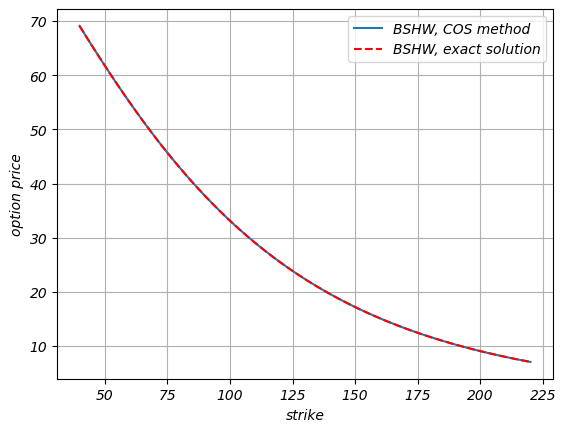

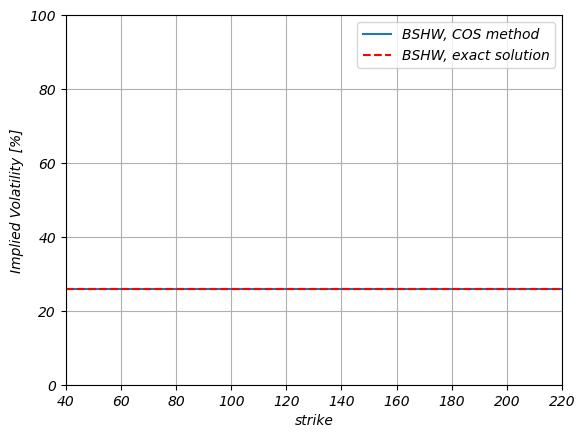

In [1]:

import numpy as np

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.stats as st
import enum
import scipy.optimize as optimize

# set i= imaginary number

i = 1j

# time-step needed for differentiation
dt = 0.0001


# This class defines puts and calls
class OptionType(enum.Enum):
    CALL = 1.0
    PUT = -1.0


def CallPutOptionPriceCOSMthd_StochIR(cf, CP, S0, tau, K, N, L, P0T):
    # cf   - characteristic function as a functon, in the book denoted as \varphi
    # CP   - C for call and P for put
    # S0   - Initial stock price
    # tau  - time to maturity
    # K    - list of strikes
    # N    - Number of expansion terms
    # L    - size of truncation domain (typ.:L=8 or L=10)
    # P0T  - zero-coupon bond for maturity T.

    # reshape K to a column vector
    if K is not np.array:
        K = np.array(K).reshape([len(K), 1])

    # assigning i=sqrt(-1)
    i = 1j
    x0 = np.log(S0 / K)

    # truncation domain
    a = 0.0 - L * np.sqrt(tau)
    b = 0.0 + L * np.sqrt(tau)

    # sumation from k = 0 to k=N-1
    k = np.linspace(0, N - 1, N).reshape([N, 1])
    u = k * np.pi / (b - a);

    # Determine coefficients for Put Prices
    H_k = CallPutCoefficients(OptionType.PUT, a, b, k)
    mat = np.exp(i * np.outer((x0 - a), u))
    temp = cf(u) * H_k
    temp[0] = 0.5 * temp[0]
    value = K * np.real(mat.dot(temp))

    # we use call-put parity for call options
    if CP == OptionType.CALL:
        value = value + S0 - K * P0T

    return value


# Determine coefficients for Put Prices
def CallPutCoefficients(CP, a, b, k):
    if CP == OptionType.CALL:
        c = 0.0
        d = b
        coef = Chi_Psi(a, b, c, d, k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        if a < b and b < 0.0:
            H_k = np.zeros([len(k), 1])
        else:
            H_k = 2.0 / (b - a) * (Chi_k - Psi_k)
    elif CP == OptionType.PUT:
        c = a
        d = 0.0
        coef = Chi_Psi(a, b, c, d, k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        H_k = 2.0 / (b - a) * (- Chi_k + Psi_k)

    return H_k


def Chi_Psi(a, b, c, d, k):
    psi = np.sin(k * np.pi * (d - a) / (b - a)) - np.sin(k * np.pi * (c - a) / (b - a))
    psi[1:] = psi[1:] * (b - a) / (k[1:] * np.pi)
    psi[0] = d - c

    chi = 1.0 / (1.0 + np.power((k * np.pi / (b - a)), 2.0))
    expr1 = np.cos(k * np.pi * (d - a) / (b - a)) * np.exp(d) - np.cos(k * np.pi
                                                                       * (c - a) / (b - a)) * np.exp(c)
    expr2 = k * np.pi / (b - a) * np.sin(k * np.pi *
                                         (d - a) / (b - a)) - k * np.pi / (b - a) * np.sin(k
                                                                                           * np.pi * (c - a) / (
                                                                                                       b - a)) * np.exp(
        c)
    chi = chi * (expr1 + expr2)

    value = {"chi": chi, "psi": psi}
    return value


# Black-Scholes Call option price
def BS_Call_Option_Price(CP, S_0, K, sigma, tau, r):
    if K is list:
        K = np.array(K).reshape([len(K), 1])
    d1 = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma, 2.0))
          * tau) / float(sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf(d2) * K * np.exp(-r * tau)
    elif CP == OptionType.PUT:
        value = st.norm.cdf(-d2) * K * np.exp(-r * tau) - st.norm.cdf(-d1) * S_0
    return value


# Implied volatility method
def ImpliedVolatilityBlack76(CP, marketPrice, K, T, S_0):
    func = lambda sigma: np.power(BS_Call_Option_Price(CP, S_0, K, sigma, T, 0.0) - marketPrice, 1.0)
    impliedVol = optimize.newton(func, 0.2, tol=1e-9)
    # impliedVol = optimize.brent(func, brack= (0.05, 2))
    return impliedVol


def ChFBSHW(u, T, P0T, lambd, eta, rho, sigma):
    i = 1j
    f0T = lambda t: - (np.log(P0T(t + dt)) - np.log(P0T(t - dt))) / (2 * dt)

    # Initial interest rate is a forward rate at time t->0
    r0 = f0T(0.00001)

    theta = lambda t: 1.0 / lambd * (f0T(t + dt) - f0T(t - dt)) / (2.0 * dt) + f0T(t) \
                      + eta * eta / (2.0 * lambd * lambd) * (1.0 - np.exp(-2.0 * lambd * t))
    C = lambda u, tau: 1.0 / lambd * (i * u - 1.0) * (1.0 - np.exp(-lambd * tau))

    # define a grid for the numerical integration of function theta
    zGrid = np.linspace(0.0, T, 2500)
    term1 = lambda u: 0.5 * sigma * sigma * i * u * (i * u - 1.0) * T
    term2 = lambda u: i * u * rho * sigma * eta / lambd * (i * u - 1.0) * (T + 1.0 / lambd \
                                                                           * (np.exp(-lambd * T) - 1.0))
    term3 = lambda u: eta * eta / (4.0 * np.power(lambd, 3.0)) * np.power(i + u, 2.0) * \
                      (3.0 + np.exp(-2.0 * lambd * T) - 4.0 * np.exp(-lambd * T) - 2.0 * lambd * T)
    term4 = lambda u: lambd * np.trapz(theta(T - zGrid) * C(u, zGrid), zGrid)
    A = lambda u: term1(u) + term2(u) + term3(u) + term4(u)

    # Note that we don't include B(u)*x0 term as it is included in the COS method
    cf = lambda u: np.exp(A(u) + C(u, T) * r0)

    # Iterate over all u and collect the ChF, iteration is necessary due to the integration over in term4
    cfV = []
    for ui in u:
        cfV.append(cf(ui))

    return cfV


def BSHWVolatility(T, eta, sigma, rho, lambd):
    Br = lambda t, T: 1 / lambd * (np.exp(-lambd * (T - t)) - 1.0)
    sigmaF = lambda t: np.sqrt(sigma * sigma + eta * eta * Br(t, T) * Br(t, T) \
                               - 2.0 * rho * sigma * eta * Br(t, T))
    zGrid = np.linspace(0.0, T, 2500)
    sigmaC = np.sqrt(1 / T * np.trapz(sigmaF(zGrid) * sigmaF(zGrid), zGrid))
    return sigmaC


def BSHWOptionPrice(CP, S0, K, P0T, T, eta, sigma, rho, lambd):
    frwdS0 = S0 / P0T
    vol = BSHWVolatility(T, eta, sigma, rho, lambd)
    # As we deal with the forward prices we evaluate Black's 76 prices
    r = 0.0
    BlackPrice = BS_Call_Option_Price(CP, frwdS0, K, vol, T, r)
    return P0T * BlackPrice


def mainCalculation():
    CP = OptionType.CALL

    K = np.linspace(40.0, 220.0, 100)
    K = np.array(K).reshape([len(K), 1])

    # HW model settings
    lambd = 0.1
    eta = 0.05
    sigma = 0.2
    rho = 0.3
    S0 = 100

    T = 5.0
    # We define a ZCB curve (obtained from the market)
    P0T = lambda T: np.exp(-0.05 * T)

    N = 500
    L = 8

    # Characteristic function of the BSHW model + the COS method
    cf = lambda u: ChFBSHW(u, T, P0T, lambd, eta, rho, sigma)
    valCOS = CallPutOptionPriceCOSMthd_StochIR(cf, CP, S0, T, K, N, L, P0T(T))
    exactBSHW = BSHWOptionPrice(CP, S0, K, P0T(T), T, eta, sigma, rho, lambd)

    IV = np.zeros([len(K), 1])
    for idx in range(0, len(K)):
        frwdStock = S0 / P0T(T)
        valCOSFrwd = valCOS[idx] / P0T(T)
        IV[idx] = ImpliedVolatilityBlack76(CP, valCOSFrwd, K[idx], T, frwdStock)

    IVExact = BSHWVolatility(T, eta, sigma, rho, lambd)

    print(IVExact)
    # Plot option prices
    plt.figure(1)
    plt.plot(K, valCOS)
    plt.plot(K, exactBSHW, '--r')
    plt.grid()
    plt.xlabel("strike")
    plt.ylabel("option price")
    plt.legend(["BSHW, COS method", "BSHW, exact solution"])
    plt.show()

    # Plot implied volatilities
    plt.figure(2)
    plt.plot(K, IV * 100.0)
    plt.plot(K, np.ones([len(K), 1]) * IVExact * 100.0, '--r')
    plt.grid()
    plt.xlabel("strike")
    plt.ylabel("Implied Volatility [%]")
    plt.legend(["BSHW, COS method", "BSHW, exact solution"])
    plt.axis([np.min(K), np.max(K), 0, 100])
    plt.show()


mainCalculation()